<h2><center> MSDS 6370: Statistical Sampling </center></h2>
<h3><center> Lab 2 <br> Jack Nelson </center></h3> 

### Exercise 1

In [29]:
import pandas as pd
email_sample = pd.read_csv('email_survey.csv')

# Town 1 Sample Summary Statistics
email_town1 = email_sample[email_sample['Town'] == 1]
email_town1['Response'].describe()

count    25.000000
mean     48.200000
std      11.940826
min      23.000000
25%      37.000000
50%      54.000000
75%      56.000000
max      62.000000
Name: Response, dtype: float64

In [30]:
# Town 2 Sample Summary Statistics
email_town2 = email_sample[email_sample['Town'] == 2]
email_town2['Response'].describe()

count    25.000000
mean     39.760000
std       9.430801
min      23.000000
25%      32.000000
50%      40.000000
75%      47.000000
max      56.000000
Name: Response, dtype: float64

### Exercise 2  
  
No, these are not good estimates of the means for each town.  Samples were taken solely based on those who responded to the email survey but certain districts have varying percentages of the population with email.  Coverage bias was injected by excluding those without access to email and selection bias was introduced since certain districts might be over/under represented based on their percentage of the population with email compared to other districts in that town.  The samples taken are not representative of the population where all residents of a town have an equal chance of selection. 

In [31]:
district_email_perc = pd.read_csv('email_rates.csv')
print district_email_perc

   Town  District  Perc_email
0     1         1         0.4
1     1         2         0.5
2     1         3         0.7
3     1         4         0.8
4     1         5         0.3
5     2         1         0.2
6     2         2         0.4
7     2         3         0.3
8     2         4         0.6
9     2         5         0.8


### Exercise 3  
  
Weighting is done by using the percentage of the population with email access.  It does not correct for coverage bias but it does correct for selection bias assuming all districts in the town contain the same number of people and each vote per district is equal to other districts.  

$$\frac{\sum_{i=1}^{n}{w_iy_i}}{\sum_{i=1}^{n}{w_i}} $$
*$w_i$= district percentage of population with email for ith respondant*  
*$y_i$= suggested education budget ($k) for ith respondant*

In [36]:
email_town1 = email_town1.merge(district_email_perc, on = ['Town', 'District'])
(email_town1.Response * email_town1['Perc_email']).sum() / email_town1['Perc_email'].sum()

51.620915032679733

In [37]:
email_town2 = email_town2.merge(district_email_perc, on = ['Town', 'District'])
(email_town2.Response * email_town2['Perc_email']).sum() / email_town2['Perc_email'].sum()

40.089552238805965

### Exercise 4  
  
Assuming all districts in the town contain the same number of people and each vote per district is equal to other districts, a face-to-face survey allows for each unit in the population to have an equal chance of selection.  The selection bias is not present.

In [39]:
inperson_sample = pd.read_csv('face_survey.csv')

# Town 1 Sample Summary Statistics
inperson_town1 = inperson_sample[inperson_sample['Town'] == 1]
inperson_town1['Response'].describe()

count    500.000000
mean      45.172000
std       12.408964
min       17.000000
25%       35.000000
50%       44.500000
75%       56.000000
max       75.000000
Name: Response, dtype: float64

In [40]:
# Town 1 Sample Summary Statistics
inperson_town2 = inperson_sample[inperson_sample['Town'] == 2]
inperson_town2['Response'].describe()

count    2000.000000
mean       43.187000
std        10.522518
min        15.000000
25%        35.000000
50%        44.000000
75%        51.000000
max        72.000000
Name: Response, dtype: float64

### Exercise 5
For Town 1 the unweighted sample mean was 48.2k but later corrected to 51.6k after weighting based on percentage with emails in each district, raising the mean by about 3.5k.  However, the face-to-face survey showed that a sample mean representative of the population is actually lower at 45.2k.  
  
For Town 2 the unweighted sample mean was 39.8 but later corrected to 40.1k, slightly raising the sample mean by 0.3k.  However, the face-to-face survey showed that a sample mean representative of the population is actually even higher at 43.2k.

### Exercise 6

Text(0.5,0,u'Education Budget ($k)')

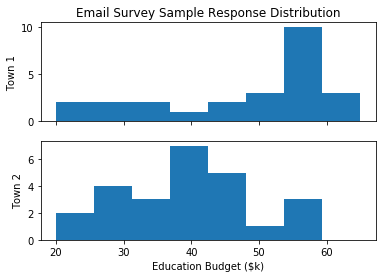

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

f, ((ax1, ax2)) = plt.subplots(2, 1, sharex = 'col')
ax1.hist(email_town1['Response'], range = (20, 65), bins = 8)
ax1.set_title('Email Survey Sample Response Distribution')
ax1.set_ylabel('Town 1')
ax2.hist(email_town2['Response'], range = (20, 65), bins = 8)
ax2.set_ylabel('Town 2')
ax2.set_xlabel('Education Budget ($k)')

Town 1 appears to have to left-skewed bell-shaped distribution while Town 2 has a much more centered bell-shaped distribution.

### Exercise 7

Text(0.5,0,u'Education Budget ($k)')

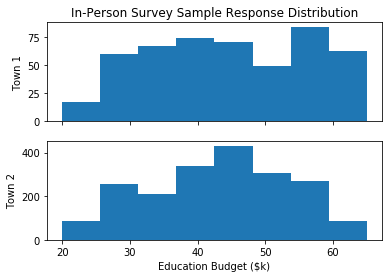

In [49]:
f, ((ax1, ax2)) = plt.subplots(2, 1, sharex = 'col')
ax1.hist(inperson_town1['Response'], range = (20, 65), bins = 8)
ax1.set_title('In-Person Survey Sample Response Distribution')
ax1.set_ylabel('Town 1')
ax2.hist(inperson_town2['Response'], range = (20, 65), bins = 8)
ax2.set_ylabel('Town 2')
ax2.set_xlabel('Education Budget ($k)')

### Exercise 8  
  
For Town 1, when only including those with email, there appears to be a distribution relative of a normal distribution with some skewing toward the left.  However, after including both those with email and those without, the distribution appears to be much more uniform.  

For Town 2, both histograms resemble a bell shaped distribution, the face-to-face response is only slightly wider.  This correlates with the changes in the mean between the two samples since they were close to one another.  

The in-person survey is a better estimate of the population mean for both towns.  As observed in Town 1, those without email were not represented in the sample causing the sample mean to shift to the right, over estimating the true population mean.  Eliminating the coverage bias in the on-person survey solves this potential vulnerability.